In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def do_fft(sig, dt):
    """
    FFT a time domain signal
    
    Inputs:
        sig: Signal
        dt: Time resolution of the data
    
    Outputs:
        amp: Normalized Ampliture
        cplx: Complex values of the signal
        freq: Frequency values along the X-axis
    """
    # The function returns complex valued response
    cplx = np.fft.rfft(sig)
    # Get the norm
    amp = 2*(np.abs(cplx)/sig.shape[-1])
    # Get the frequency
    freq = np.fft.rfftfreq(sig.size, dt)
    
    return cplx, amp, freq

The docstrings are necessary. Do:  
`df_fft?` ad the docstring should pop up

In [3]:
do_fft?
# Sweet

In [4]:
lf = 1
hf = 16

freqs = np.arange(lf, hf+1)
print(freqs)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [5]:
freqs.shape

(16,)

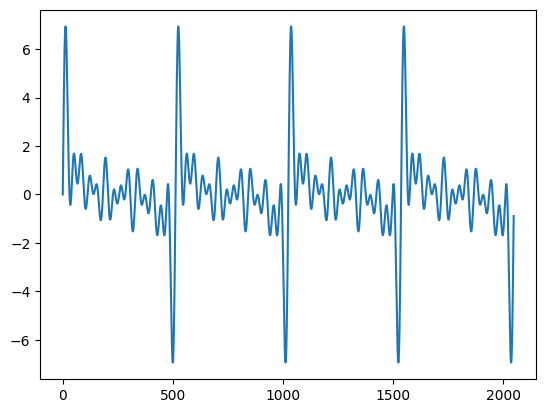

In [6]:
np.random.seed(0)

# Sampling Rate
sr = 512
tmax = 4
dt = 1/sr
t = np.arange(0, tmax, dt)

sig = np.zeros_like(t)

for f in freqs:
    sig += (np.random.rand()*np.sin(2*np.pi*f*t))
    
plt.plot(sig)

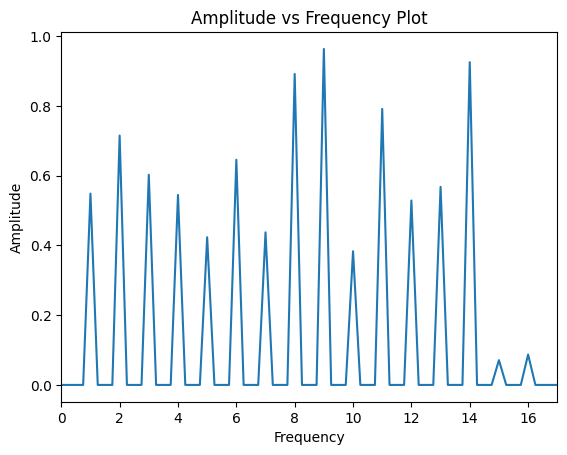

In [7]:
cplx, amp, freq = do_fft(sig, dt)
plt.plot(freq, amp)
plt.xlim([0, hf+1])
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Amplitude vs Frequency Plot")
plt.show()

In [8]:
freq[20]

5.0

## Idealized Low Pass Filter

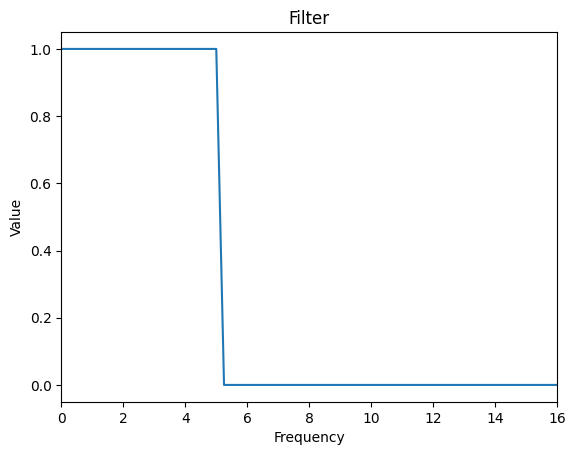

In [9]:
# Want everything less than 5 Hz to be there; Everything greater than that to be 0
lp_cut = 5
lp_filt = (freq <= lp_cut)
# Or you can use flatnonzero, nonzero and where
plt.plot(freq, lp_filt)
plt.xlim([0, 16])
plt.xlabel("Frequency")
plt.ylabel("Value")
plt.title("Filter")
plt.show()

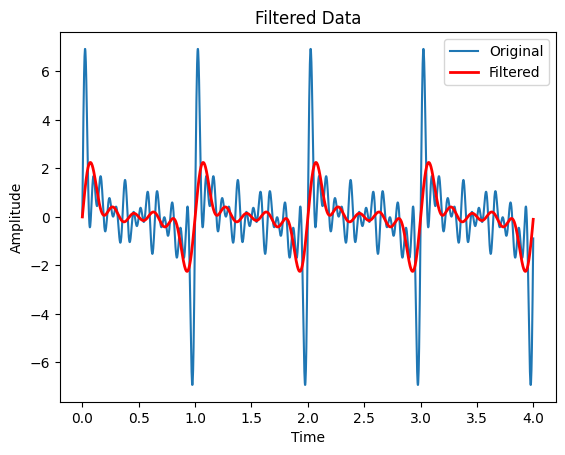

In [10]:
# Get only the filtered region
filt_data = cplx*lp_filt

# Inverse fourier transform
inv_filt_data = np.fft.irfft(filt_data)

plt.plot(t, sig, label="Original")
plt.plot(t, inv_filt_data, 'r', linewidth=2, label="Filtered")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Filtered Data")
plt.show()

## Idealized High Pass Filter

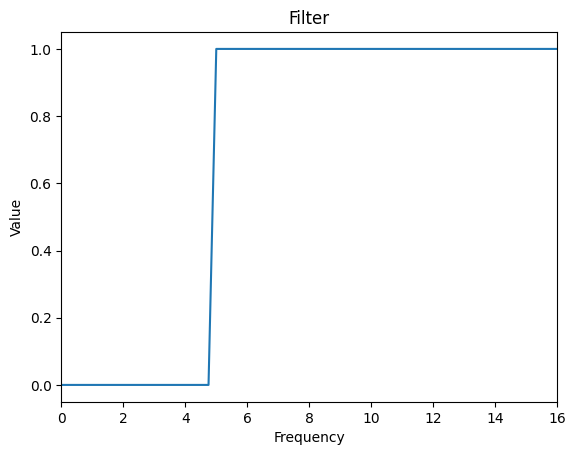

In [11]:
# Want everything less than 5 Hz to be there; Everything greater than that to be 0
hp_cut = 5
hp_filt = (freq >= hp_cut)
# Or you can use flatnonzero, nonzero and where
plt.plot(freq, hp_filt)
plt.xlim([0, 16])
plt.xlabel("Frequency")
plt.ylabel("Value")
plt.title("Filter")
plt.show()

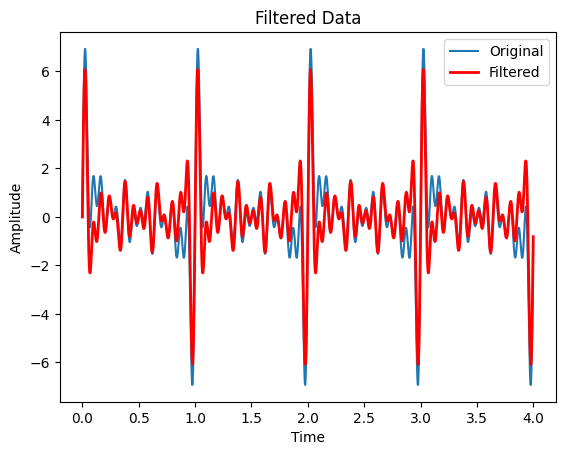

In [12]:
# Get only the filtered region
filt_data = cplx*hp_filt

# Inverse fourier transform
inv_filt_data = np.fft.irfft(filt_data)

plt.plot(t, sig, label="Original")
plt.plot(t, inv_filt_data, 'r', linewidth=2, label="Filtered")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Filtered Data")
plt.show()

## Idealized Band Pass Filter

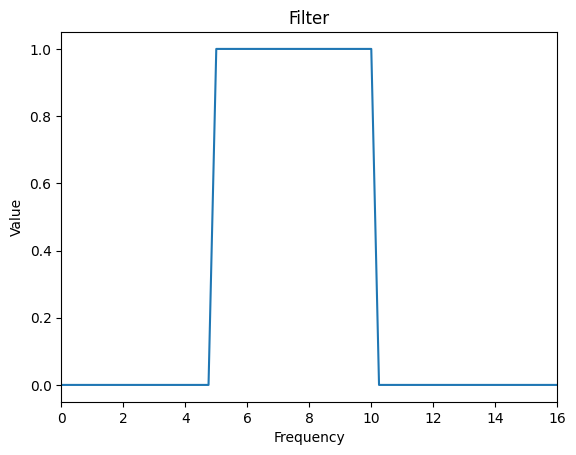

In [13]:
# Want everything less than 5 Hz to be there; Everything greater than that to be 0
lp_cut = 5
hp_cut = 10
band_filt = (freq >= lp_cut) & (freq <= hp_cut)
# Or you can use flatnonzero, nonzero and where
plt.plot(freq, band_filt)
plt.xlim([0, 16])
plt.xlabel("Frequency")
plt.ylabel("Value")
plt.title("Filter")
plt.show()

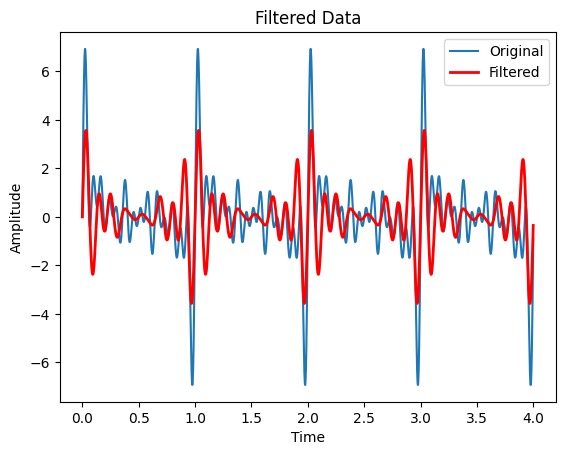

In [14]:
# Get only the filtered region
filt_data = cplx*band_filt

# Inverse fourier transform
inv_filt_data = np.fft.irfft(filt_data)

plt.plot(t, sig, label="Original")
plt.plot(t, inv_filt_data, 'r', linewidth=2, label="Filtered")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Filtered Data")
plt.show()

In [16]:
%%writefile my_brick_filt.py
# Cell magic (%%) and Line magic (%)

import numpy as np

def define_filt(freq, filt_freq, type_filt):
    """
    Generate the filter
    Inputs:
        freq: actual set of frequencies
        filt_freq: frequencies that have to be filtered
        type_filt: type pf filter that has to be implemented
    """
    
    if type_filt == "lp":
        lp = filt_freq
        bool_flag = freq <= lp
    elif type_freq == "hp":
        hp = filt_freq
        bool_flag = freq >= hp
    elif type_freq == "band":
        lp,hp = filt_freq
        bool_flag = (freq >= lp) & (freq <= hp)
    else:
        raise ValueError("The filter type should be 'lp', 'hp' or 'band'")
        
    return bool_flag


def apply_filt(sig, filt):
    """
    Fucntion to apply the filter on the signal
    Input:
        sig: The signal
        filt: Filter
    Output: Filtered Signal
    """
    
    cplx = np.fft.rfft(sig)
    
    return np.fft.irfft(cplx * filt)

Writing my_brick_filt.py


In [17]:
import my_brick_filt as mbf

In [20]:
mbf.define_filt?, mbf.apply_filt?

When you have a really good resolution in the frequency domain, the tempral domain resolution is horrible.
So, instead of a sharp fall, you try to make is less fast. The slope is made smaller. Thi gradual decrease is called "Fallout"